In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import seaborn as sns

In [2]:
DF= pd.read_csv("../Data_v4_AllNaNsReplaced_dummies.csv")
DF.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,Utilities,HouseStyle,OverallQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,2,0,4,4,2.0,7,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,2,0,4,4,1.0,6,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,2,0,3,4,2.0,7,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,2,0,3,4,2.0,7,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,2,0,3,4,2.0,8,...,0,0,0,1,0,0,0,0,1,0


In [3]:
DF.shape

(1460, 211)

In [4]:
# Importing the dataset
dataset = DF.copy()

# X is the predictor variable
X = DF.iloc[:, 0:80].values

# y is the response variable
y = DF.SalePrice.values


In [5]:
# Splitting data 
# Splingintg original datsa in to test (20% of data) and train(80% of data)
from sklearn.cross_validation import train_test_split
x_train, true_x_test, y_train, true_y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

C:\Users\WeiKuang\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
# # Splitting train into modeling_test (25% of D2) and modeling_train (75% of D2) 
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.25, random_state = 0)

In [7]:
print(x_train.shape)
print(x_test.shape)
print(true_x_test.shape)


(876, 80)
(292, 80)
(292, 80)


In [297]:
import lightgbm as lgb

d_train = lgb.Dataset(x_train, label=y_train)
params = {}
params['learning_rate'] = 0.121
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = 'mse'
params['sub_feature'] = 0.3
params['num_leaves'] = 8
params['min_data'] = 2
params['max_depth'] = 5
clf = lgb.train(params, d_train, 100)

In [298]:
#Prediction
y_pred=clf.predict(x_test)
mse = np.mean((y_test-y_pred)**2)
mse


140259570.08968645

In [293]:
140259570 > 4179519051

False

## Julia's LightGBM procedure

In [299]:
import lightgbm as lgb

d_train = lgb.Dataset(x_train, label=y_train)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = 'mse'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10
clf = lgb.train(params, d_train, 100)

In [300]:
#Prediction
y_pred=clf.predict(x_test)
mse = np.mean((y_test-y_pred)**2)
mse

4179519051.5019965

In [269]:
mse = np.mean((y_test-y_pred)**2)
mse

4179519051.5019965

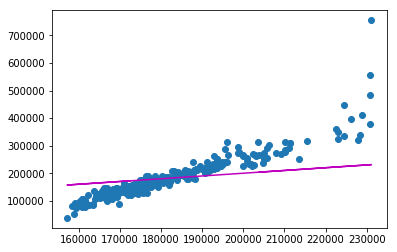

In [270]:
plt.scatter(y_pred,y_test)
plt.plot(y_pred,y_pred,"m")
plt.show()

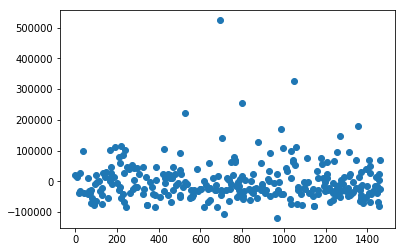

In [271]:
plt.scatter(x_test[:,0],y_test-y_pred)
plt.show()

In [301]:
MSEs = {}
Mse_last = mse
for lr in np.linspace(0.01,1,100):
    params['learning_rate'] = lr
    clf = lgb.train(params, d_train, 100)
    y_pred=clf.predict(x_test)
    Mse = np.mean((y_pred-y_test)**2)
    if Mse > Mse_last:
        break
    MSEs.update({"learning_rate = " + str(round(lr,3)) : Mse})
    Mse_last = Mse

In [302]:
MSEs

{'learning_rate = 0.01': 1889233600.851637,
 'learning_rate = 0.02': 1003702688.1057637,
 'learning_rate = 0.03': 790320930.5781779,
 'learning_rate = 0.04': 715325108.123973,
 'learning_rate = 0.05': 676212482.6802417,
 'learning_rate = 0.06': 651365118.6561786,
 'learning_rate = 0.07': 628798774.5411288,
 'learning_rate = 0.08': 608765717.9987497,
 'learning_rate = 0.09': 595846103.0209448,
 'learning_rate = 0.1': 584298600.5865711,
 'learning_rate = 0.11': 572941689.3560338,
 'learning_rate = 0.12': 563846831.4176245,
 'learning_rate = 0.13': 537393615.0991888}

In [303]:
MSEs = {}
Mse_last = mse
for lr in np.linspace(0.12,0.14,21):
    params['learning_rate'] = lr
    clf = lgb.train(params, d_train, 100)
    y_pred=clf.predict(x_test)
    Mse = np.mean((y_pred-y_test)**2)
    if Mse > Mse_last:
        break
    MSEs.update({"learning_rate = " + str(round(lr,3)) : Mse})
    Mse_last = Mse

In [275]:
MSEs  # optimial learning_rate = 0.121

{'learning_rate = 0.12': 563846831.4176245,
 'learning_rate = 0.121': 558361811.7012626}

In [276]:
# Final test for learning_rate
params['learning_rate'] = 0.121
clf = lgb.train(params, d_train, 100)
y_pred=clf.predict(x_test)
Mse = np.mean((y_pred-y_test)**2)

In [277]:
(mse-Mse)/Mse  # new LR is 6.4x better than the original

6.485323967209532

#### Optimization for sub_feature ,  ANS = 0.3

In [278]:
MSEs = {}
Mse_last = mse
for sf in np.linspace(0.1,1,10):
    params['learning_rate'] = 0.121
    params['sub_feature'] = sf
    clf = lgb.train(params, d_train, 100)
    y_pred=clf.predict(x_test)
    Mse = np.mean((y_pred-y_test)**2)
    if Mse > Mse_last:
        break
    MSEs.update({"sub_feature = " + str(round(sf,3)) : Mse})
    Mse_last = Mse

MSEs

{'sub_feature = 0.1': 786565266.4007452,
 'sub_feature = 0.2': 625967723.1986251,
 'sub_feature = 0.3': 586777361.8041312}

#### Optimization for num_leaves  ( the input needs to be int),  ANS =8

In [279]:
MSEs = {}
Mse_last = mse
for nl in range(2,10):
    params['learning_rate'] = 0.121
    params['sub_feature'] = 0.3
    params['num_leaves'] = nl
    clf = lgb.train(params, d_train, 100)
    y_pred=clf.predict(x_test)
    Mse = np.mean((y_pred-y_test)**2)
    if Mse > Mse_last:
        break
    MSEs.update({"num_leaves = " + str(round(nl,3)) : Mse})
    Mse_last = Mse

MSEs

{'num_leaves = 2': 737274437.5261226,
 'num_leaves = 3': 656000322.8665174,
 'num_leaves = 4': 644268383.3375119,
 'num_leaves = 5': 637989431.0896362,
 'num_leaves = 6': 628075859.9761411,
 'num_leaves = 7': 597301051.6879051,
 'num_leaves = 8': 591468770.1057334}

#### Optimization for min_data,  ANS = 2

In [280]:
MSEs = {}
Mse_last = mse
for md in range(1,50):
    params['learning_rate'] = 0.121
    params['sub_feature'] = 0.3
    params['num_leaves'] = 8
    params['min_data'] = md
    clf = lgb.train(params, d_train, 100)
    y_pred=clf.predict(x_test)
    Mse = np.mean((y_pred-y_test)**2)
    if Mse > Mse_last:
        break
    MSEs.update({"min_data = " + str(round(md,3)) : Mse})
    Mse_last = Mse

MSEs

{'min_data = 1': 303918468.9420912, 'min_data = 2': 283786331.50798005}

In [281]:
MSEs = {}
Mse_last = mse
for md in range(2,4):
    params['learning_rate'] = 0.121
    params['sub_feature'] = 0.3
    params['num_leaves'] = 8
    params['min_data'] = md
    clf = lgb.train(params, d_train, 100)
    y_pred=clf.predict(x_test)
    Mse = np.mean((y_pred-y_test)**2)
    if Mse > Mse_last:
        break
    MSEs.update({"min_data = " + str(round(md,3)) : Mse})
    Mse_last = Mse

MSEs

{'min_data = 2': 283786331.50798005}

## Optimization for min_data, ANS = 5

In [304]:
MSEs = {}
Mse_last = mse
for maxd in range(1,20):
    params['learning_rate'] = 0.121
    params['sub_feature'] = 0.3
    params['num_leaves'] = 8
    params['min_data'] = 2
    params['max_depth'] = maxd
    clf = lgb.train(params, d_train, 100)
    y_pred=clf.predict(x_test)
    Mse = np.mean((y_pred-y_test)**2)
    #if Mse > Mse_last:
    #    break
    MSEs.update({"max_depth = " + str(round(maxd,3)) : Mse})
    Mse_last = Mse

MSEs

{'max_depth = 1': 367667599.93893003,
 'max_depth = 10': 283786331.50798005,
 'max_depth = 11': 283786331.50798005,
 'max_depth = 12': 283786331.50798005,
 'max_depth = 13': 283786331.50798005,
 'max_depth = 14': 283786331.50798005,
 'max_depth = 15': 283786331.50798005,
 'max_depth = 16': 283786331.50798005,
 'max_depth = 17': 283786331.50798005,
 'max_depth = 18': 283786331.50798005,
 'max_depth = 19': 283786331.50798005,
 'max_depth = 2': 368766100.9287893,
 'max_depth = 3': 323062879.4542025,
 'max_depth = 4': 320081458.0189372,
 'max_depth = 5': 270536487.00089747,
 'max_depth = 6': 283326327.15449464,
 'max_depth = 7': 283786331.50798005,
 'max_depth = 8': 283786331.50798005,
 'max_depth = 9': 283786331.50798005}

## End of Julia's LightGBM
the optimal parameters are:
params['learning_rate'] = 0.121
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = 'mse'
params['sub_feature'] = 0.3
params['num_leaves'] = 8
params['min_data'] = 2
params['max_depth'] = 5

## Apply the models (parameters settings) to the true testing data set

In [311]:
import lightgbm as lgb

d_train = lgb.Dataset(true_x_test, label= true_y_test)
params = {}
params['learning_rate'] = 0.121
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = 'mse'
params['sub_feature'] = 0.3
params['num_leaves'] = 8
params['min_data'] = 2
params['max_depth'] = 5
clf = lgb.train(params, d_train, 100)

In [312]:
y_pred=clf.predict(true_x_test)
y_pred

array([203368.09116674, 138403.55854972, 113916.06924881, 189016.47130245,
        90932.84177646,  85472.44548304, 275196.11248442, 140873.73435174,
       740897.25310065, 147984.66247707, 207366.61823162, 135698.39836394,
       226008.39236848, 128010.33817053, 120268.74421368, 147744.91069351,
       191940.99632179, 120770.36852641, 147972.1182222 , 154177.83960823,
       162793.04529954, 149513.09023585, 108200.91915222, 174684.52975045,
       188514.40235878, 170783.0826439 , 175338.05592752,  83861.09128822,
       324201.51213857, 115802.09986657, 112990.33291089, 212412.28717711,
       153602.39154301, 257337.81687748, 365850.21317989, 177902.53235473,
       282727.5092516 , 117375.79285022, 259171.44553174, 328969.16217969,
       240047.03395457, 130550.65509203, 173408.2592902 , 282796.11419851,
       401507.30809222, 121064.70686422, 124289.12746054, 126963.1992897 ,
       173048.35461928,  89286.88558937, 409434.43394756, 149717.32345208,
       166382.15836619,  

In [313]:
# final mse
mse = np.mean((true_y_test-y_pred)**2)
mse

9819810.192821689

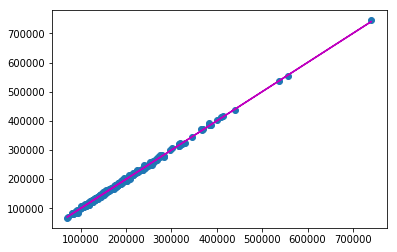

In [314]:
plt.scatter(y_pred,true_y_test)
plt.plot(y_pred,y_pred,"m")
plt.show()

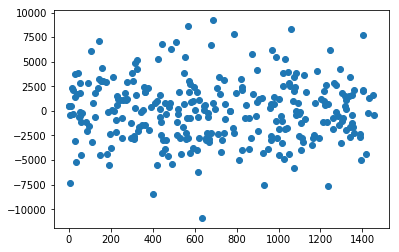

In [315]:
plt.scatter(true_x_test[:,0],true_y_test-y_pred)
plt.show()